In [1]:
from astropy.io import fits 
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import proj_plane_pixel_scales, skycoord_to_pixel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroquery.vizier import Vizier

from astrosceni.stars_filter import StarsFilter
from astrosceni.image import Image

#Initialize filter and images
filter = StarsFilter(data_directory_path="../data")
NB = Image()
BB = Image()

#load data into Image classes, crop image
NB.load("../data/bs_h_wcs.fit")
NB.cropPixels(x_start = 120, x_end = -120, y_start=80, y_end = -80)
BB.load("../data/bs_h_wcs.fit")
BB.cropPixels(x_start = 120, x_end = -120, y_start=80, y_end = -80)


        Use textwrap.indent() instead. [astropy.io.fits.hdu.hdulist]
    Header size is not multiple of 2880: 3123514
There may be extra bytes after the last HDU or the file is corrupted. [astropy.io.fits.hdu.hdulist]
        Use textwrap.indent() instead. [astropy.io.fits.hdu.hdulist]
    Header size is not multiple of 2880: 3123514
There may be extra bytes after the last HDU or the file is corrupted. [astropy.io.fits.hdu.hdulist]


In [2]:
#Simple Usage (Hipparcus Catalogue Data)
#Default catalogue is hipparcus
# Returns image object, header is same, filtered data is saved into original_data
filtered_NB = filter.filterStars(NB)

Previous saved catalog file found.
Stars in region: 17
Visible stars: 0


In [5]:
# These just save data to variables for image comparison
hipparcus_stars_in_region = filter.getStarsInRegion()
hipparcus_stars_visible = filter.getVisibleStars()

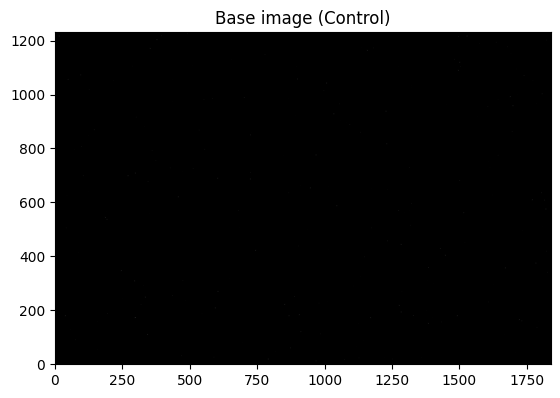

In [6]:
#Plot showing base image for comparison
plt.imshow(NB.getImageData(original = False), origin='lower', cmap='gray')
plt.title("Base image (Control)")
plt.show()

Empty DataFrame
Columns: []
Index: []


KeyError: 'x_pixels'

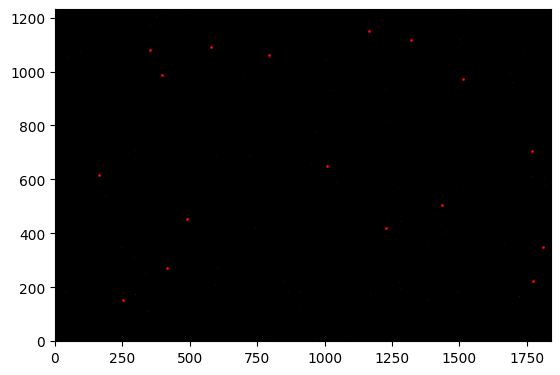

In [8]:
#Plot showing hipparcus visible stars plotted on top of stars just within the bounds of the iamge
#Red is not visible star, blue is visible star
plt.imshow(NB.getImageData(original = False), origin='lower', cmap = 'gray')
plt.scatter(hipparcus_stars_in_region['x_pixels'], hipparcus_stars_in_region['y_pixels'], s=1, color = 'red')
print(hipparcus_stars_visible)
plt.scatter(hipparcus_stars_visible['x_pixels'], hipparcus_stars_visible['y_pixels'], s=1, color = 'blue')
plt.title("Hipparcus stars within image")
plt.show()

In [ ]:
#Plot showing filtered image for comparison
plt.imshow(filtered_NB.getImageData(original = True), origin='lower', cmap='gray')
plt.title("Base image (Stars Removed)")
plt.show()

In [ ]:
#Complex Usage (TYCHO-2 Catalogue Data) (~80MB!)

#Catalogue was defined, and RA, DE and apparent magnitude columns were defined
#Downloads catalogue to files by default
filter.setCatalogue(catalogue_id="I/259/tyc2", ra_col_name="RA(ICRS)", dec_col_name="DE(ICRS)", app_mag_col_name="VTmag")

# Saves the stars within the bounds of the image, visible or not
filter.setStarsInRegion(NB)
tycho_stars_in_region = filter.getStarsInRegion()

print("Stars within region: ", tycho_stars_in_region.shape[0])

# Seperately saves the stars within the bounds of the image AND visible, determined by gaussian fitting
filter.setVisibleStars(NB)
tycho_stars_visible = filter.getVisibleStars()

print(tycho_stars_visible.shape[0])

# Counts how many stars have been considered not visible
stars_removed = tycho_stars_in_region.shape[0] - tycho_stars_visible.shape[0]
print("Stars removed within region (Considered not visible): ", stars_removed)


In [8]:
# Returns the data of the image where the stars have been subtracted
# Requires image class to be passed in
filtered_tycho_NB = filter.removeVisibleStars(NB)

In [ ]:
#Plot showing base image for comparison
plt.imshow(NB.getImageData(original = False), origin='lower', cmap='gray')
plt.title("Base image (Control)")
plt.show()

In [ ]:
#Plot showing tycho visible stars plotted on top of stars just within the bounds of the iamge
#Red is not visible star, blue is visible star
plt.imshow(NB.getImageData(original = False), origin='lower', cmap = 'gray')
plt.scatter(tycho_stars_in_region['x_pixels'], tycho_stars_in_region['y_pixels'], s=1, color = 'red')
plt.scatter(tycho_stars_visible['x_pixels'], tycho_stars_visible['y_pixels'], s=1, color = 'blue')
plt.title("Tycho stars within image")
plt.show()


In [ ]:
#Plot showing filtered image for comparison
plt.imshow(filtered_tycho_NB.getImageData(original = True), origin='lower', cmap='gray')
plt.title("Base image (Stars Removed)")
plt.show()

In [ ]:
#Complex Usage (Hipparcus Catalogue Data)

#Downlaods catalogue to files by default
filter.setCatalogue(download_catalogue = True)

# Saves the stars within the bounds of the image, visible or not
filter.setStarsInRegion(NB)

# Saves the stars within the bounds of the image, visible or not
hipparcus_stars_in_image = filter.getStarsInRegion()

# Seperately saves the stars within the bounds of the image AND visible, determined by gaussian fitting
filter.setVisibleStars(NB)
hipparcus_stars_visible = filter.getVisibleStars()

# Counts how many stars have been considered not visible
starsRemoved = hipparcus_stars_in_image.shape[0] - hipparcus_stars_visible.shape[0]
print(f"Number of stars removed: {starsRemoved}")
print(hipparcus_stars_visible)

In [ ]:
# Plots histogram of specific star to see frequency of counts
testingStarIndex = 7
filter.plotHistOfStar(testingStarIndex, NB, BB)